# Purpose: Visualizations of finalized dataset 

In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [ ]:
df = pd.read_excel('RGG_RSS_final.xlsx')
sorted(df['Neighborhood'].unique())


Index(['Commodity', 'Vehicle Type', 'Inside/Curb', '16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal', 'Meandor', 'Route', 'Tipper', 'Day',
       '#Units', 'Time', 'Company', 'Outlier', 'Truck', 'Neighborhood',
       'Address_Street', 'Code', 'Has Key'],
      dtype='object')

(array([1.162e+04, 1.021e+03, 1.450e+02, 2.400e+01, 1.100e+01, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  182.4,  364.8,  547.2,  729.6,  912. , 1094.4, 1276.8,
        1459.2, 1641.6, 1824. ]),
 <BarContainer object of 10 artists>)

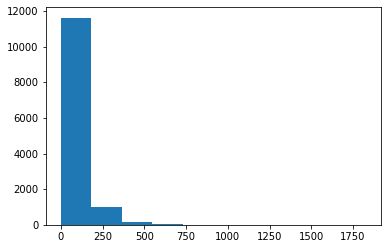

In [ ]:
fig, ax = plt.subplots()

plt.hist(df.Time)

In [ ]:
#df['Code'].unique()
df.groupby['Code']['Time'].median()

TypeError: 'method' object is not subscriptable

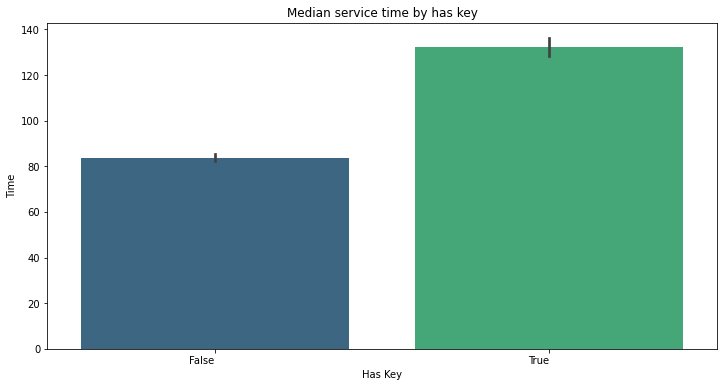

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))

hood_time = sns.barplot(data=df, x='Has Key', 
                     y='Time', 
                     palette='viridis') 
                     
hood_time.set_title('Median service time by Has Key') 
hood_time.set_xticklabels(hood_time.get_xticklabels(), 
                          horizontalalignment='right')

plt.show()

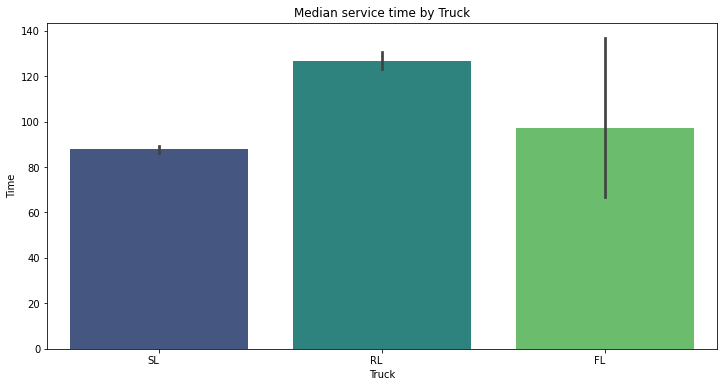

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))

hood_time = sns.barplot(data=df, x='Truck', 
                     y='Time', 
                     palette='viridis') 
                     
hood_time.set_title('Median service time by Truck') 
hood_time.set_xticklabels(hood_time.get_xticklabels(), 
                          horizontalalignment='right')

plt.show()

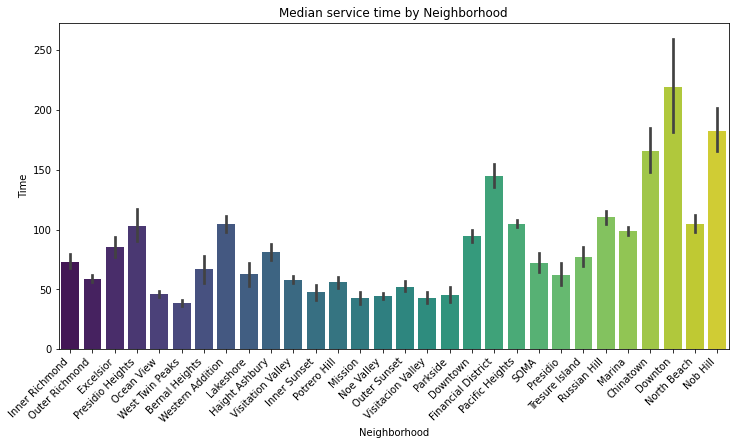

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))

hood_time = sns.barplot(data=df, x='Neighborhood', 
                     y='Time', 
                     palette='viridis') 
                     
hood_time.set_title('Median service time by Neighborhood') 
hood_time.set_xticklabels(hood_time.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')

plt.show()

<AxesSubplot:xlabel='Truck', ylabel='count'>

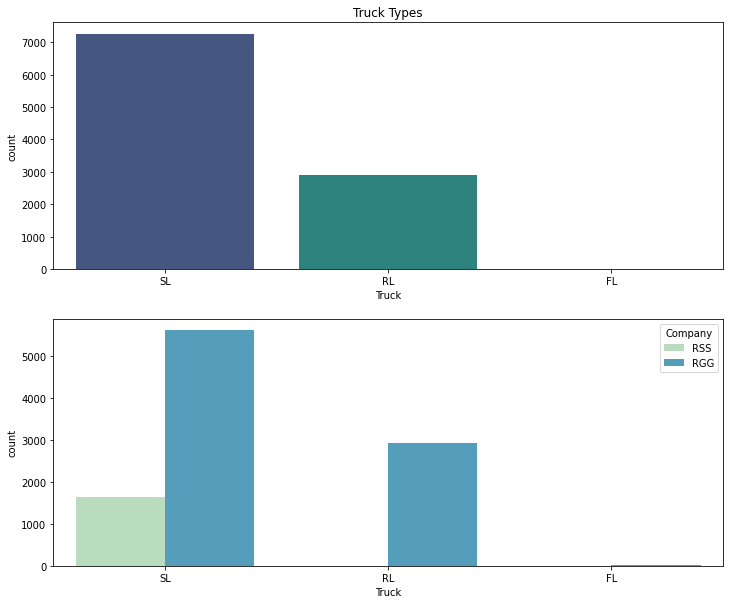

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(12,10))

sns.countplot(data=df,x="Truck", palette='viridis', ax=ax[0]).set_title("Truck Types")
sns.countplot(data=df,x="Truck", palette='GnBu', hue='Company', ax=ax[1])

<AxesSubplot:xlabel='#Units', ylabel='count'>

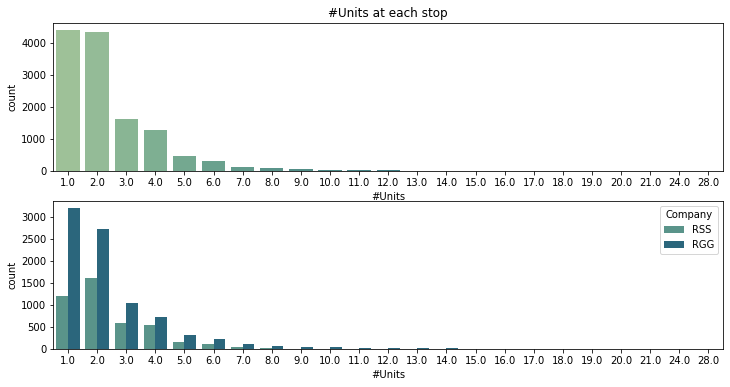

In [ ]:
fig,ax = plt.subplots(2,1, figsize=(12,6))

sns.countplot(data=df,x="#Units", palette='crest', ax=ax[0]).set_title('#Units at each stop')

sns.countplot(data=df,x="#Units", palette='crest', ax=ax[1], hue='Company')

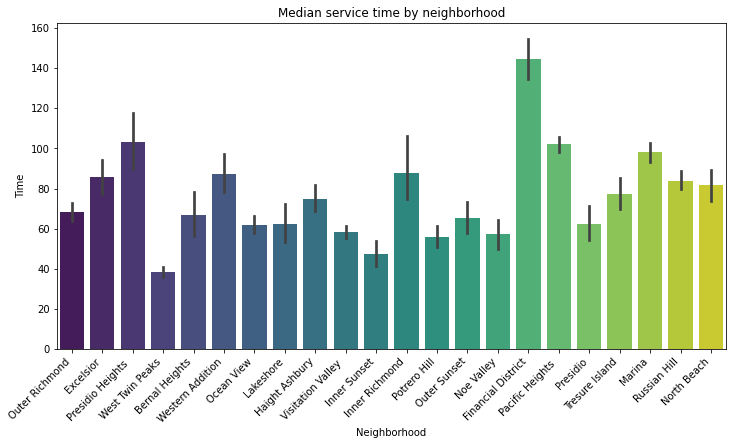

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))

hood_time = sns.barplot(data=df, x='Neighborhood', 
                     y='Time', 
                     palette='viridis') 
                     
hood_time.set_title('Median service time by neighborhood') 
hood_time.set_xticklabels(hood_time.get_xticklabels(), 
                          rotation=45,  
                          horizontalalignment='right')

plt.show()

# Create a new df that sorts service time by neighborhood to change the order of the plot above

In [ ]:
df_neighborhood_sorted = df.copy()
df_neighborhood_sorted.columns

Index(['Commodity', 'Vehicle Type', 'Inside/Curb', '16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal', 'Meandor', 'Route', 'Tipper', 'Key Code?',
       'Day', '#Units', 'Time', 'Company', 'Outlier', 'Truck', 'Neighborhood'],
      dtype='object')

In [ ]:
#df['Counts'] = df.groupby(['Color'])['Value'].transform('count')

neighborhood_med = df_neighborhood_sorted.groupby('Neighborhood')['Time'].median()
df_neighborhood_med = neighborhood_med.to_frame().reset_index()
df_neighborhood_med.columns
df_neighborhood_med.rename(columns={'Time':'Median Time'}, inplace=True)

In [ ]:
df_neighborhood_sorted = df_neighborhood_sorted.merge(df_neighborhood_med, how='left', on='Neighborhood')
df_neighborhood_sorted = df_neighborhood_sorted.sort_values(['Median Time'], ascending=False)

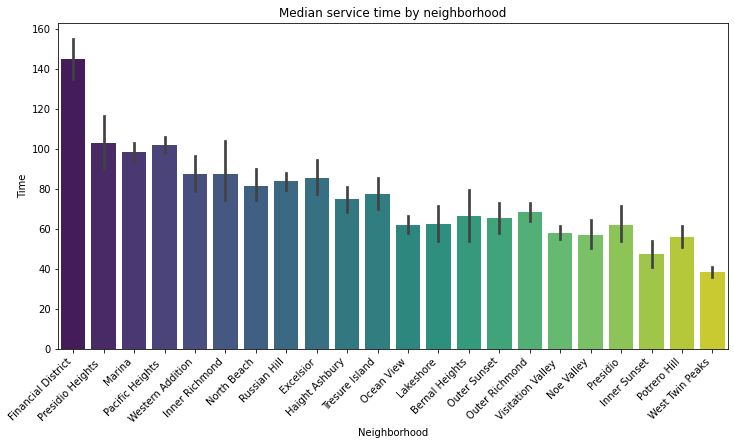

In [ ]:
cfig,ax = plt.subplots(figsize=(12,6))

hood_time = sns.barplot(data=df_neighborhood_sorted, x='Neighborhood', 
                     y='Time', 
                     palette='viridis') 
                     
hood_time.set_title('Median service time by neighborhood') 
hood_time.set_xticklabels(hood_time.get_xticklabels(), 
                          rotation=45,  
                          horizontalalignment='right')

plt.show()

In [ ]:
# Routes for routing project

routes = [975, 988, 989, 990]
for route in routes:
    print(f"Route {route} occurs", len(df.loc[df['Route']==route]), "times in the final dataframe")


df_routing_project = df.copy()
df_routing_project = df_routing_project.loc[df_routing_project['Route'].isin([975, 988, 989, 990])]

df_routing_project['Company'].value_counts()

Route 975 occurs 0 times in the final dataframe
Route 988 occurs 264 times in the final dataframe
Route 989 occurs 225 times in the final dataframe
Route 990 occurs 144 times in the final dataframe


<AxesSubplot:xlabel='#Units', ylabel='Time'>

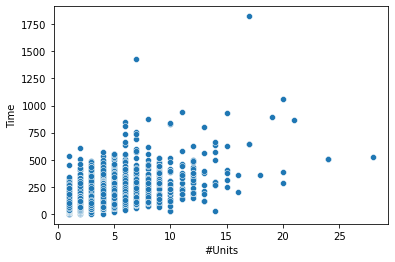

In [ ]:
sns.scatterplot(x='#Units', y='Time', data=df)

RGG    633
Name: Company, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=938c6ad9-491d-4307-bf8a-c751a244ce4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>